# Importation 

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data

In [2]:
import pandas as pd

data = []
with open('chronic_kidney_disease (1).arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data, columns=names)

FileNotFoundError: [Errno 2] No such file or directory: 'chronic_kidney_disease (1).arff'

# Data Exploration


In [ ]:
df.shape

#### Display features names


In [ ]:
df.columns

#### display 5 first rows

In [ ]:
df.head()

#### display 5 last rows

In [ ]:
df.tail()

#### Display informations about Dataframe

In [ ]:
df.info()

#### We notice that all variables are object while most of our features are reals and integers.
#### Even null values are typed as a string of characters ('?') that is why we find that there are 0 null values.
#### the variable 'no_name' has only 3 non-zero values. It is a column generated because of a data entry error.

####   

#### Extract all the values used for each column to better understand the defects of our dataset:

In [20]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79']
unique values in "bp":
 ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120']
unique values in "sg":
 ['1.020' '1.010' '1.005' '1.015' '?' '1.025']
unique values in "al":
 ['1' '4' '2' '3' '0' '?' '5']
unique values in "su":
 ['0' '3' '4' '1' '?' '2' '5']
unique values in "rbc":
 ['?' 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' '?']
unique values in "pcc":
 ['notpresent' 'present' '?']
unique values in "ba":
 ['notpresent' 'present' '?']
unique values in "bgr":
 ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99

#### we noticed that all variables are entered as a string of characters (even integers and floats).
#### Also, spaces were typed before or after entering the values of some examples.

 #### 

##### We then decided to convert the '?' and 't?' into Nan from the beginning to better visualize the data in this exploration phase.

In [21]:
df=df.replace('?', np.nan)

In [22]:
df=df.replace('\t?', np.nan)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      391 non-null    object
 1   bp       388 non-null    object
 2   sg       353 non-null    object
 3   al       354 non-null    object
 4   su       351 non-null    object
 5   rbc      248 non-null    object
 6   pc       335 non-null    object
 7   pcc      396 non-null    object
 8   ba       396 non-null    object
 9   bgr      356 non-null    object
 10  bu       381 non-null    object
 11  sc       383 non-null    object
 12  sod      313 non-null    object
 13  pot      312 non-null    object
 14  hemo     348 non-null    object
 15  pcv      329 non-null    object
 16  wbcc     294 non-null    object
 17  rbcc     269 non-null    object
 18  htn      398 non-null    object
 19  dm       398 non-null    object
 20  cad      398 non-null    object
 21  appet    399 non-null    object
 22  pe

## interpretation about .info():
#### We see that there are several null values that must be transformed into Mean or Mode.

#### display the number of null values we have

In [24]:
df.isnull().sum().sum()

1409

In [25]:
df["no_name"].unique()

array([None, '', 'notckd'], dtype=object)

#### we Noticed  that there is a column that has only 3 non-zero rows ("no_name")

In [26]:
df[df["no_name"].notnull()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
69,26,70,1.015,0,4,NaN,normal,notpresent,notpresent,250,...,6900,6.0,no,yes,no,good,no,no,ckd,
72,64,90,1.010,3,3,NaN,abnormal,present,notpresent,NaN,...,NaN,NaN,yes,yes,no,good,yes,no,ckd,
369,75,70,1.020,0,0,normal,normal,notpresent,notpresent,107,...,10300,4.8,no,,no,no,good,no,no,notckd


#### We notice that 2 rows among the 3 are useless (just spaces added by mistake) and for the third, we see that there is a shift in the filling of the columns from the variable "dm" (a mistake made during filling).

### Check if there is a redandante line

In [27]:
df.duplicated().any()

False

### View a summary of descriptive statistics


In [28]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
count,391,388,353,354,351,248,335,396,396,356,...,294,269,398,398,398,399,399,399,400,3
unique,76,10,5,6,6,2,2,2,2,146,...,91,48,2,6,3,3,3,2,4,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,99,...,9800,5.2,no,no,no,good,no,no,ckd,
freq,19,116,106,199,290,201,259,354,374,10,...,11,18,251,257,362,316,322,339,248,2


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


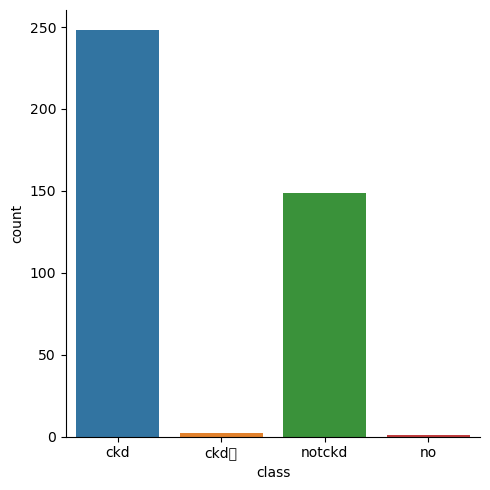

In [29]:
sns.catplot(x='class',data=df,kind="count")

#### So we notice that our dataset is not balanced. 37.5% of observations have the value of class = 0 and 62.5% have a value = 1.

## Explore the variation of each feature with the target variable

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


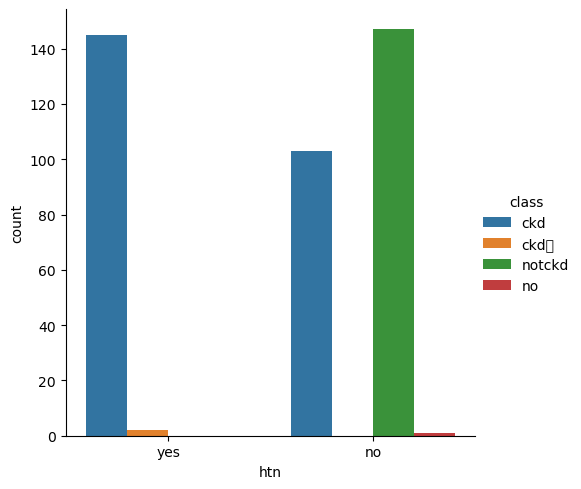

In [30]:
sns.catplot(x='htn',hue='class',data=df,kind="count")

#### we Noticed that the value 'ckd' and 'notckd' for the class column was sometimes miswritten (by adding a space or writing 'no' only instead of notckd) 
#### Most cases that have a value equal to 'yes' for the htn variable have ckd disease 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


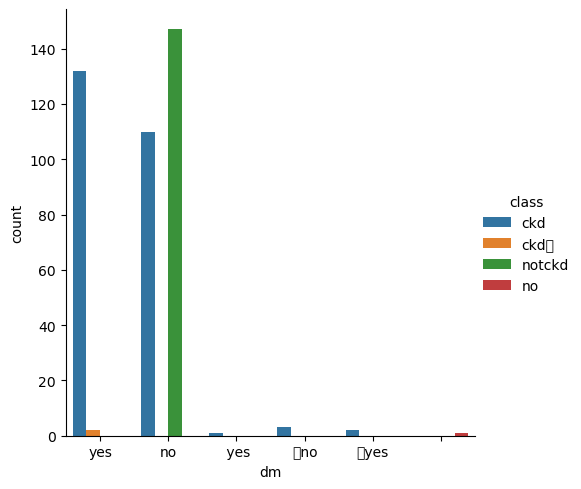

In [31]:
sns.catplot(x='dm',hue='class',data=df,kind="count")

#### Most observations that have a value of 'dm' equal to 'yes' have ckd disease.
#### We also notice that 'yes' and 'no' are sometimes badly written when adding a space. 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


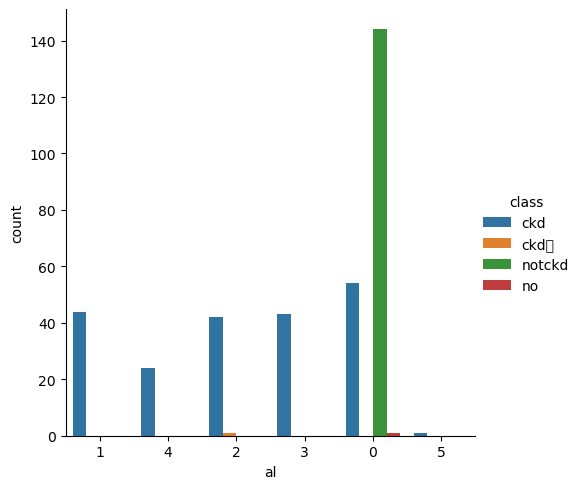

In [32]:
sns.catplot(x='al',hue='class',data=df,kind="count")

#### Most observations that do not have ckd disease have a value of 'al' equal to 0.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


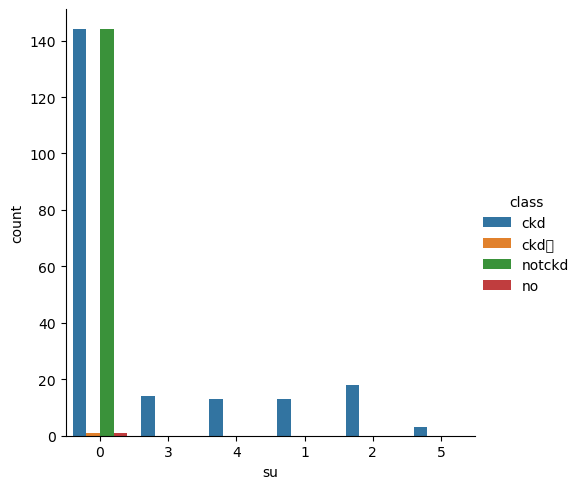

In [33]:
sns.catplot(x='su',hue='class',data=df,kind="count")

#### All cases that have a value of su > 0 have ckd disease.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


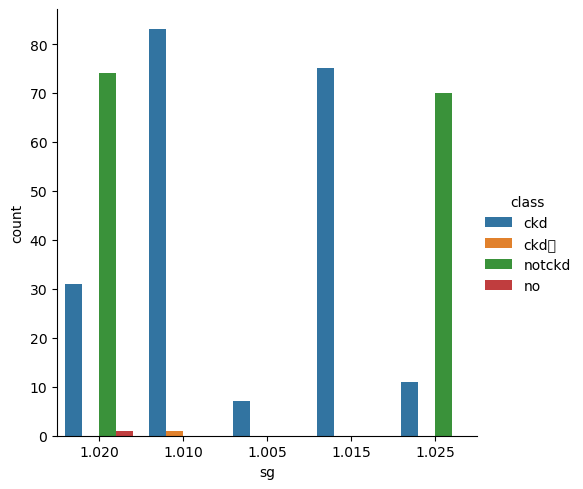

In [34]:
sns.catplot(x='sg',hue='class',data=df,kind="count")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


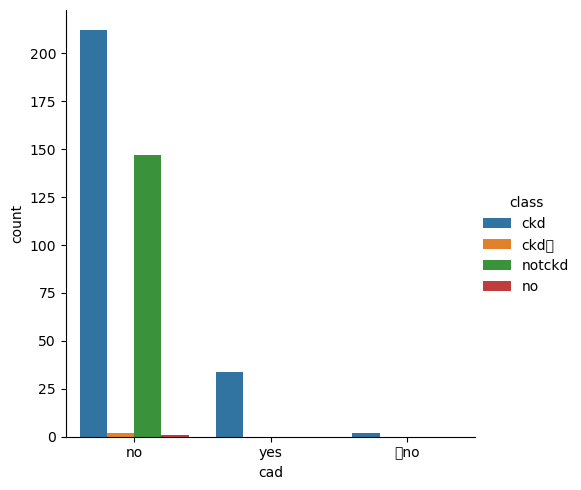

In [35]:
sns.catplot(x='cad',hue='class',data=df,kind="count")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


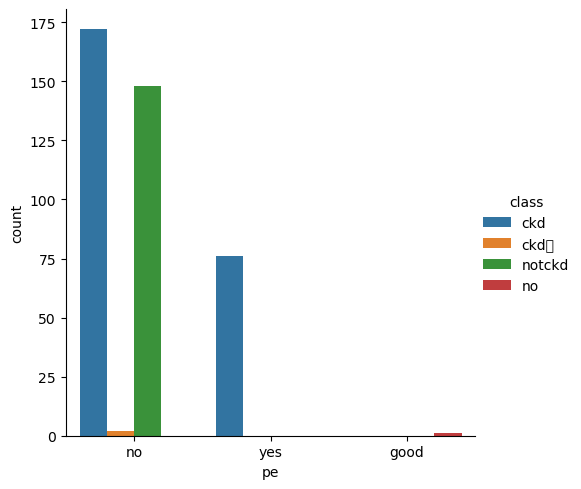

In [36]:
sns.catplot(x='pe',hue='class',data=df,kind="count")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


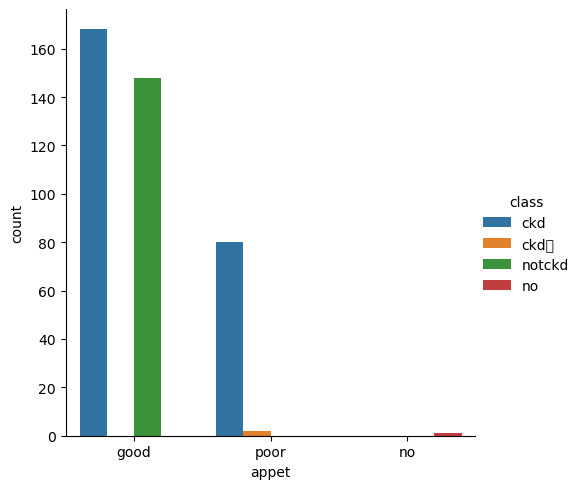

In [37]:
sns.catplot(x='appet',hue='class',data=df,kind="count")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


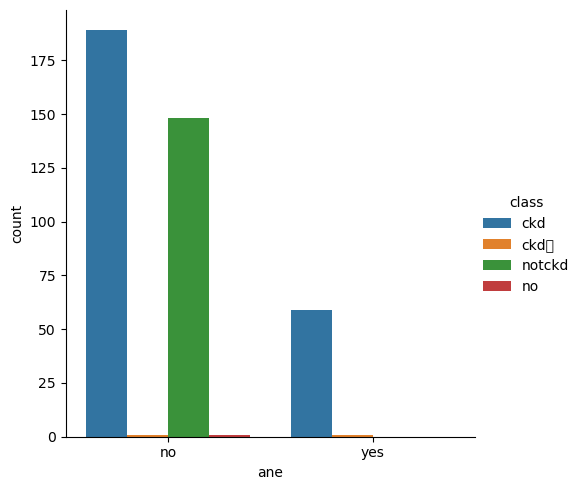

In [38]:
sns.catplot(x='ane',hue='class',data=df,kind="count")

#### The numeric values are all strings of characters, so we decided to do a conversion to better visualize the numerical variables.

In [39]:
NumericCols=["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]
for col in NumericCols:
    df[col]=df[col].astype('float')

In [40]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 ['1.020' '1.010' '1.005' '1.015' nan '1.025']
unique values in "al":
 ['1' '4' '2' '3' '0' nan '5']
unique values in "su":
 ['0' '3' '4' '1' nan '2' '5']
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 2

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


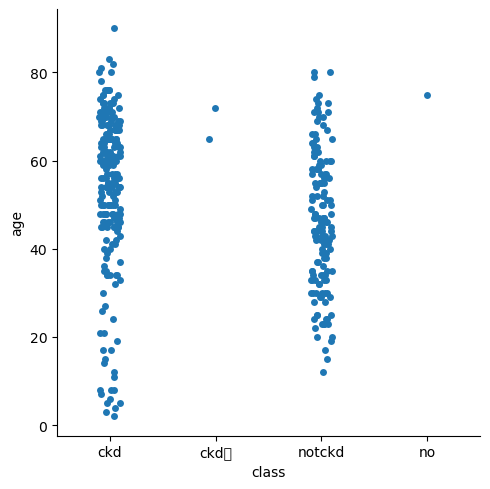

In [41]:
sns.catplot(data=df, x="class", y="age")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


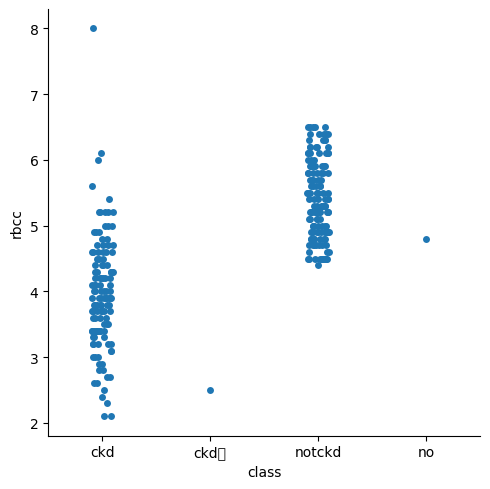

In [42]:
sns.catplot(data=df, x="class", y="rbcc")

#### Cases that have a red blood cell count value < 4.2 are all sick.
#### We also notice the existence of an unreal aberrant value when rbcc = 8 (after discussing with a business expert)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


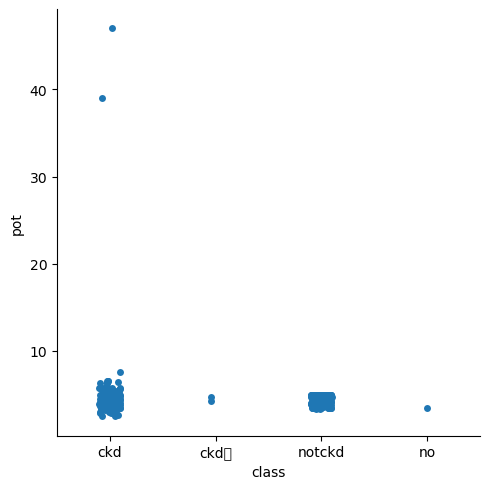

In [43]:
sns.catplot(data=df, x="class", y="pot")

##### After talking to a business expert (doctors), we see that a potassium value > 30 is unreal.##### Aprés avoir parler à un expert métier (médecins), on constate qu'une valeur de potassium > 30 est irréelle.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


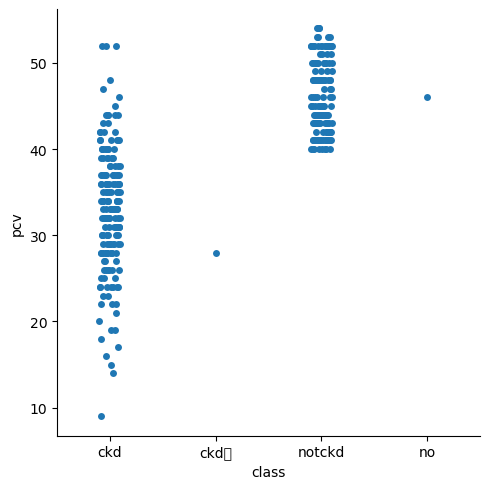

In [44]:
sns.catplot(data=df, x="class", y="pcv")

#### It is found that cases who have pcv < 40 have ckd disease

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


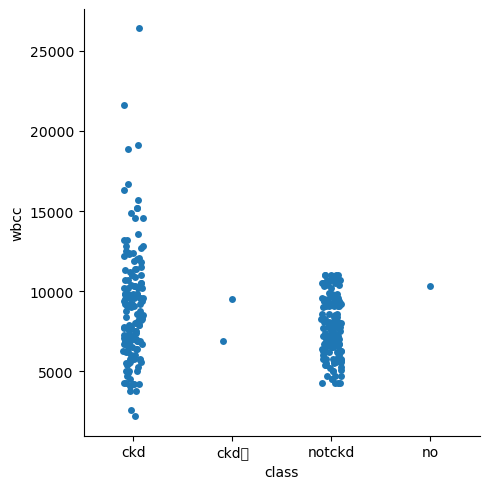

In [45]:
sns.catplot(data=df, x="class", y="wbcc")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


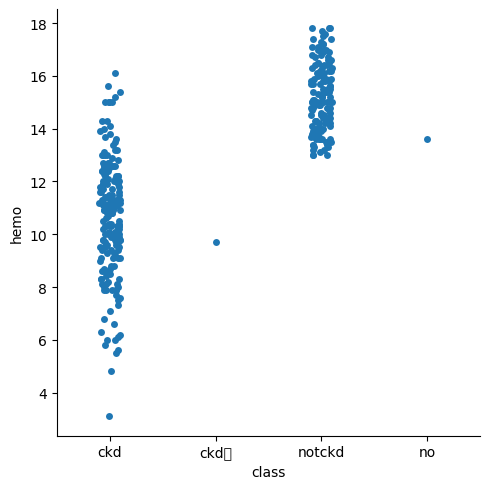

In [46]:
sns.catplot(data=df, x="class", y="hemo")

#### If the hemoglobin level is low enough (<12.5) it is very likely that this case has ckd disease.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


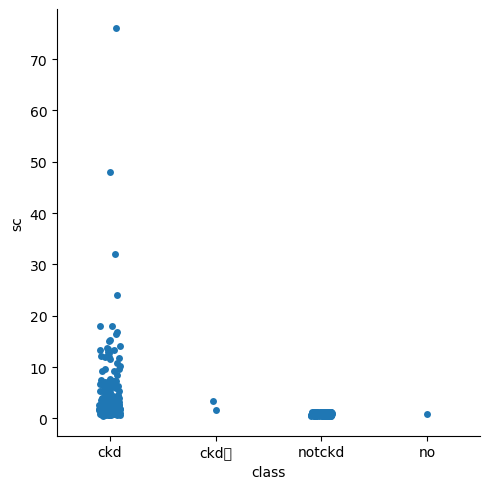

In [47]:
sns.catplot(data=df, x="class", y="sc")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


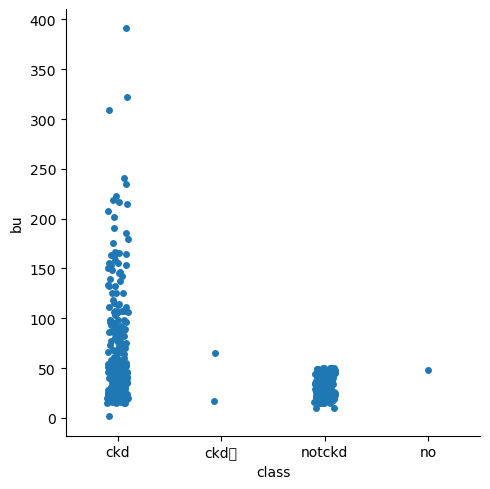

In [48]:
sns.catplot(data=df, x="class", y="bu")

## Multivariate exploration

### Correlation matrix

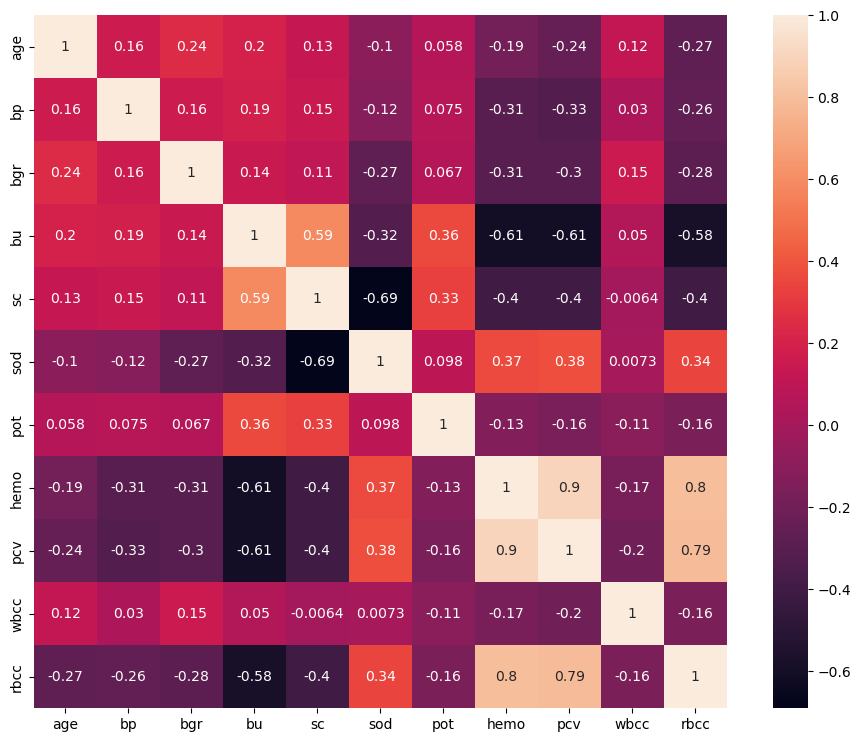

In [49]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True,annot=True);

#### we noticed that 'pcv' and 'hemo' are both positively correlated with the variable 'rbcc'.
#### The hemo variable is strongly correlated with the pcv variable

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


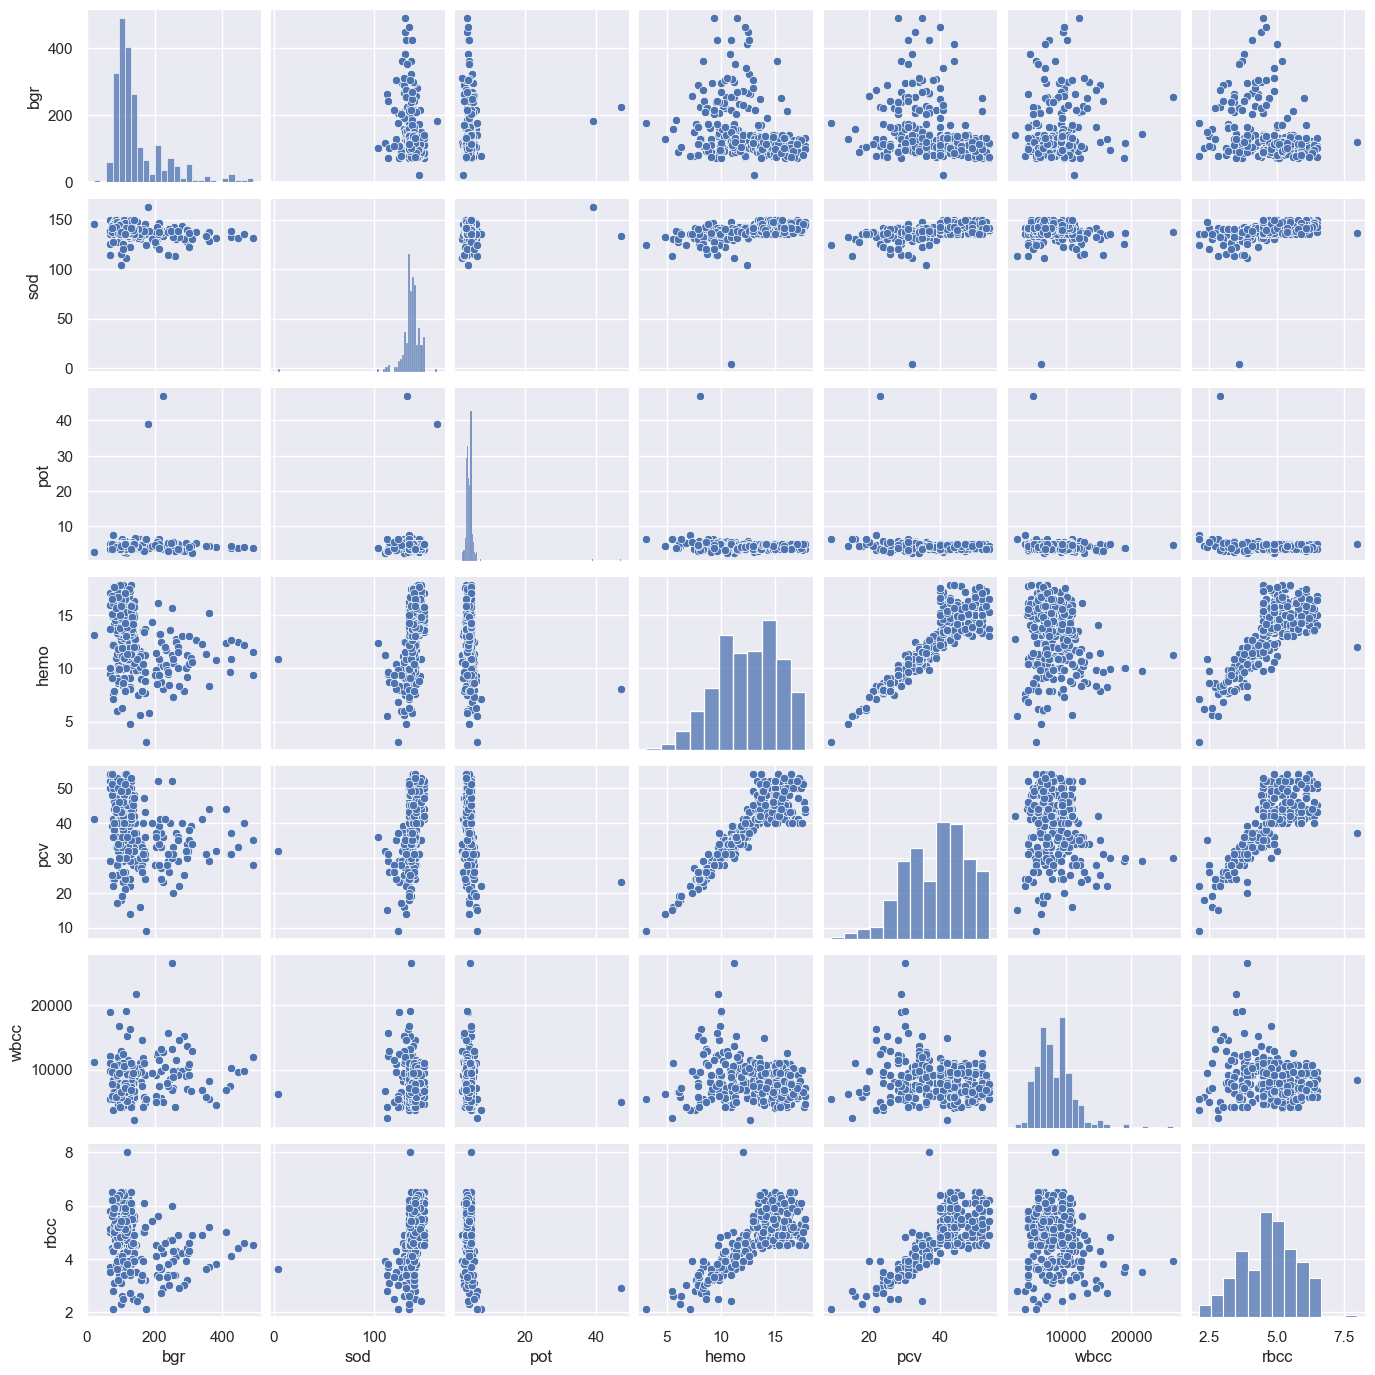

In [50]:
sns.set()
NumericCols=["bgr","sod","pot","hemo","pcv","wbcc","rbcc"]
sns.pairplot(df[NumericCols], size = 2)
plt.show();

# Data preparation

## Data cleaning

### outliers (irréelles)

#### For pot examples:

In [51]:
df.query("pot>30")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
61,67.0,80.0,1.010,1,3,normal,abnormal,notpresent,notpresent,182.0,...,NaN,NaN,no,no,no,good,yes,no,ckd,None
128,52.0,90.0,1.015,4,3,normal,abnormal,notpresent,notpresent,224.0,...,5000.0,2.9,yes,yes,no,good,no,yes,ckd,None


In [52]:
df[61:62][['pot']]=df['pot'].mean()
df[128:129][['pot']]=df['pot'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20440\2172103341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[61:62][['pot']]=df['pot'].mean()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20440\2172103341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[128:129][['pot']]=df['pot'].mean()


Verification that values have been changed:

In [53]:
print(df[128:129][['pot']])
print(df[61:62][['pot']])

      pot
128  47.0
     pot
61  39.0


#### For the example of the variable 'rbcc':#### Pour l'exemple de la variable 'rbcc':

In [54]:
df.query("rbcc>7")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
133,70.0,100.0,1.015,4,0,normal,normal,notpresent,notpresent,118.0,...,8400.0,8.0,yes,no,no,good,no,no,ckd,None


In [55]:
df[133:134][['rbcc']]=df['rbcc'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20440\1971051929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[133:134][['rbcc']]=df['rbcc'].mean()


Verification that values have been changed:

In [56]:
df[133:134][['rbcc']]

,rbcc
133,8.0


#### We must fix the offset that we have already mentioned in the data exploration section.

In [57]:
df[df["no_name"].notnull()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
69,26.0,70.0,1.015,0,4,NaN,normal,notpresent,notpresent,250.0,...,6900.0,6.0,no,yes,no,good,no,no,ckd,
72,64.0,90.0,1.010,3,3,NaN,abnormal,present,notpresent,NaN,...,NaN,NaN,yes,yes,no,good,yes,no,ckd,
369,75.0,70.0,1.020,0,0,normal,normal,notpresent,notpresent,107.0,...,10300.0,4.8,no,,no,no,good,no,no,notckd


In [58]:
#df[369:370][['dm','cad','appet','pe','ane','class']]='no','no','good','no','no','notckd'
#df[369:370]

In [59]:
df.at[369,'dm']='no'
df.at[369,'cad']='no'
df.at[369,'appet']='good'
df.at[369,'pe']='no'
df.at[369,'ane']='no'
df.at[369,'class']='notckd'
df[369:370]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
369,75.0,70.0,1.020,0,0,normal,normal,notpresent,notpresent,107.0,...,10300.0,4.8,no,no,no,good,no,no,notckd,notckd


#### After fixing this discrepancy, we delete this unnecessary column.

In [60]:
df=df.drop(["no_name"],axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


#### Let's replace the zero values of the numeric variables with the mean.

In [61]:
NumericCols=["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]
for col in NumericCols:
    df[col].fillna(value=df[col].mean(), inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

#### Let's replace the zero values of the numeric variables with the mean.

In [63]:
df = df.fillna(df.mode().iloc[0])
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


### Type conversion of categorical variables that have some real values and encoding of the rest.

In [64]:
df["su"]=df["su"].astype('float')
df["al"]=df["al"].astype('float')
df["sg"]=df["sg"].astype('float')

In [65]:
Yes_No_Cols=["ane","pe","cad","dm","htn"]
for col in Yes_No_Cols:
    df[col] = df[col].map({'yes': 1,'\tyes': 1,' yes':1, 'no': 0, '\tno':0})

In [66]:
df["class"] = df["class"].map({'ckd': 1,'ckd\t':1, 'notckd': 0})

In [67]:
df["appet"] = df["appet"].map({'good': 1, 'poor': 0})

In [68]:
df["rbc"] = df["rbc"].map({'normal': 1,'abnormal': 0})
df["pc"] = df["pc"].map({'normal': 1,'abnormal': 0})

In [69]:
df["pcc"] = df["pcc"].map({'present': 1,'notpresent': 0})
df["ba"] = df["ba"].map({'present': 1,'notpresent': 0})

### Normalisation

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
NumericCols=["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]
df[NumericCols] = sc.fit_transform(df[NumericCols])

NameError: name 'df' is not defined

In [71]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.205464,0.262338,1.020,1.0,0.0,1,1,0,0,-0.361987,...,0.628372,-0.240519,5.869017e-01,1,1,0,1,0,0,1
1,-2.623810,-1.966580,1.020,4.0,0.0,1,1,0,0,0.000000,...,-0.108649,-0.954786,1.058283e-15,0,0,0,1,0,0,1
2,0.620313,0.262338,1.010,2.0,3.0,1,1,0,0,3.681441,...,-0.968506,-0.359563,1.058283e-15,0,1,0,0,0,1,1
3,-0.205464,-0.480635,1.005,4.0,0.0,1,0,1,0,-0.415543,...,-0.845669,-0.677016,-9.620759e-01,1,0,0,0,1,1,1
4,-0.028511,0.262338,1.010,2.0,0.0,1,1,0,0,-0.562820,...,-0.477159,-0.438926,-1.280110e-01,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207425,0.262338,1.020,0.0,0.0,1,1,0,0,-0.107600,...,0.996882,-0.677016,2.294454e-01,0,0,0,1,0,0,0
396,-0.559368,-0.480635,1.025,0.0,0.0,1,1,0,0,-0.977874,...,1.856739,-0.240519,1.778423e+00,0,0,0,1,0,0,0
397,-2.328890,0.262338,1.020,0.0,0.0,1,1,0,0,-0.643153,...,1.242555,-0.716697,8.252060e-01,0,0,0,1,0,0,0
398,-2.033969,-1.223607,1.025,0.0,0.0,1,1,0,0,-0.455709,...,1.488229,-0.478608,1.420967e+00,0,0,0,1,0,0,0


In [72]:
df.isna().sum().sum()


0

In [73]:
rows_with_nan = []
for index, row in df.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[]


### Feature Selection

### Correlation-based feature selection :

In [74]:
features = df.columns.tolist()
features.remove('class')
features


['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [75]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [76]:
best_value = -1
best_feature = ''
for feature in features:
    coeff = pointbiserialr( df['class'], df[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature hemo with merit 0.7296


In [77]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [78]:
# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [79]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [80]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, 'class')
            # and push it to the queue
            queue.push(temp_subset, merit)
        

In [81]:
print(best_subset)

['hemo', 'sg', 'dm', 'pcv', 'al', 'htn']


In [82]:
df1=df[list(best_subset)+['class']]

In [83]:
df1

,hemo,sg,dm,pcv,al,htn,class
0,1.059271,1.020,1,0.628372,1.0,1,1
1,-0.452097,1.020,0,-0.108649,4.0,0,1
2,-1.078762,1.010,1,-0.968506,2.0,0,1
3,-0.488960,1.005,0,-0.845669,4.0,1,1
4,-0.341509,1.010,0,-0.477159,2.0,0,1
...,...,...,...,...,...,...,...
395,1.169859,1.020,0,0.996882,0.0,0,0
396,1.464760,1.025,0,1.856739,0.0,0,0
397,1.206722,1.020,0,1.242555,0.0,0,0
398,0.616920,1.025,0,1.488229,0.0,0,0


In [85]:

n=len(best_subset)
n

6

### Oversampling

In [86]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'class']
y = df.loc[:, df.columns == 'class']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['class'])

In [87]:
os_data_X1=os_data_X
os_data_X=os_data_X[list(best_subset)]
X_test = pd.DataFrame(data=X_test,columns=columns)
X_test1=X_test
X_test=X_test[list(best_subset)]

In [88]:
os_data_y.groupby(['class'])['class'].count()

class
0    188
1    188
Name: class, dtype: int64

In [89]:
os_data_y

,class
0,0
1,1
2,0
3,1
4,0
...,...
371,0
372,0
373,0
374,0


## Creating and testing the models (without feature selection)

### KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(2,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(os_data_X1, os_data_y.values.ravel())
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 2
Best n_neighbors: 1


In [98]:
# Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 2, 'n_neighbors': 1, 'p': 2}


In [99]:
knn = KNeighborsClassifier(n_neighbors=1,p=2,leaf_size=2)
knn_model = knn.fit(os_data_X1, os_data_y.values.ravel())
y_pred_knn = knn_model.predict(X_test1)

In [100]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(os_data_X1, os_data_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test1, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.96


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


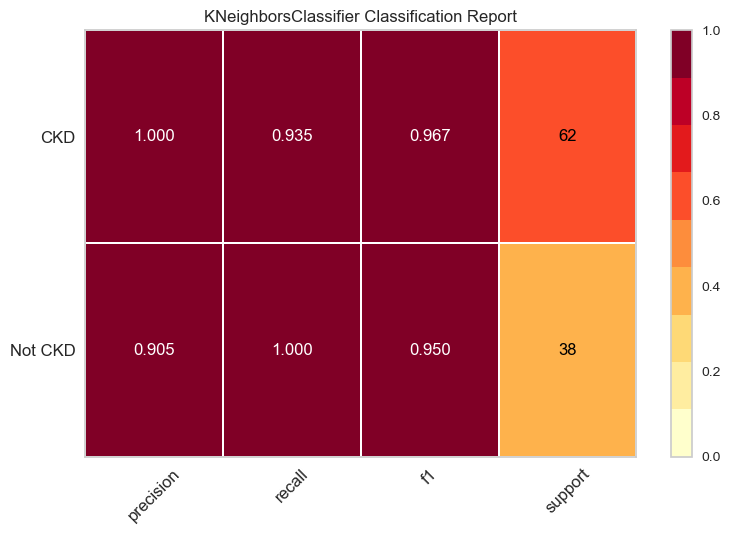

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [102]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(knn_model, classes=classes, support=True)
visualizer.fit(os_data_X1, os_data_y) 
visualizer.score(X_test1, y_test)    # Evaluate the model on the test data
visualizer.show()   

In [ ]:
from sklearn.metrics import classification_report,f1_score,recall_score,accuracy_score,precision_score


In [141]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.98        62

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(os_data_X1, os_data_y.values.ravel())

GaussianNB()

In [104]:
# making predictions on the testing set
y_pred = gnb.predict(X_test1) 

In [105]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 0.98


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


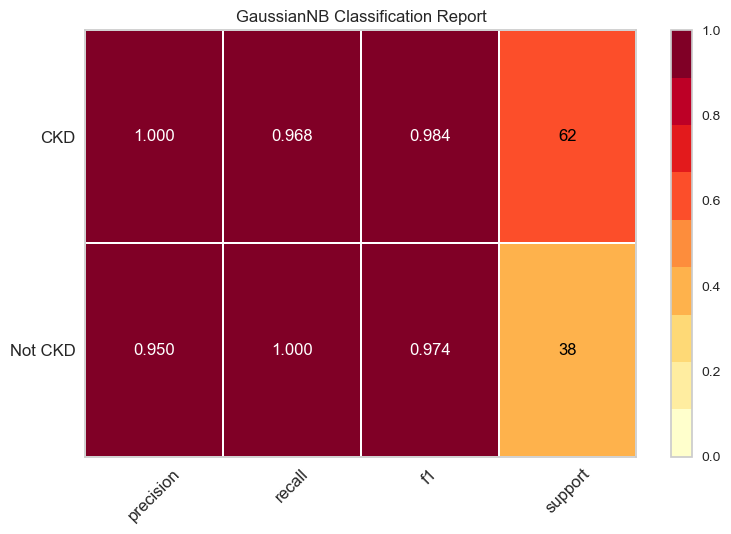

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [106]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(gnb, classes=classes, support=True)
visualizer.fit(os_data_X1, os_data_y) 
visualizer.score(X_test1, y_test)    # Evaluate the model on the test data
visualizer.show()   

### SVM

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid','poly','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(os_data_X1,  os_data_y.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

In [116]:
best_parameters = grid.best_params_
best_parameters

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [117]:
# make predictions on test set
y_pred1=grid.predict(X_test1)

In [118]:
# compute and print accuracy score
print('SVM model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

SVM model accuracy score with default hyperparameters: 0.9800


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


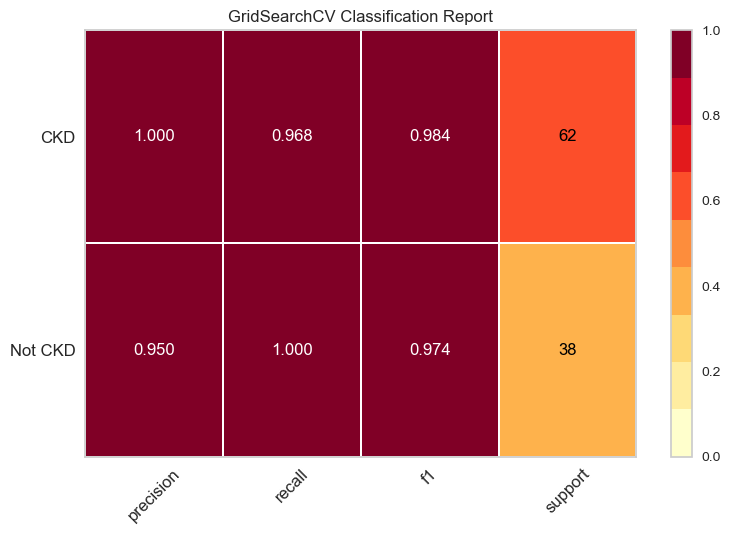

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [119]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(grid, classes=classes, support=True)
visualizer.fit(os_data_X1, os_data_y) 
visualizer.score(X_test1, y_test)    # Evaluate the model on the test data
visualizer.show()   

## Creating and testing the models with feature selection

### KNN  (with feature selection)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(2,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(os_data_X, os_data_y.values.ravel())
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 2


In [121]:
# Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}


In [122]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,leaf_size=2 )
knn_model = knn.fit(os_data_X, os_data_y.values.ravel())
y_pred_knn = knn_model.predict(X_test)

In [123]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(os_data_X, os_data_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.98


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


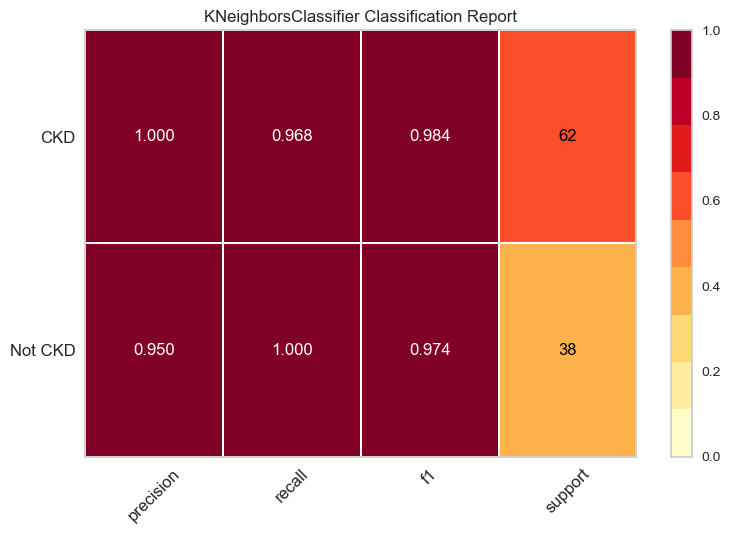

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [124]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(knn_model, classes=classes, support=True)
visualizer.fit(os_data_X, os_data_y) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

### Naive Bayes  (with feature selection)

In [125]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(os_data_X, os_data_y.values.ravel())

GaussianNB()

In [126]:
# making predictions on the testing set
y_pred = gnb.predict(X_test) 

In [127]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 0.95


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


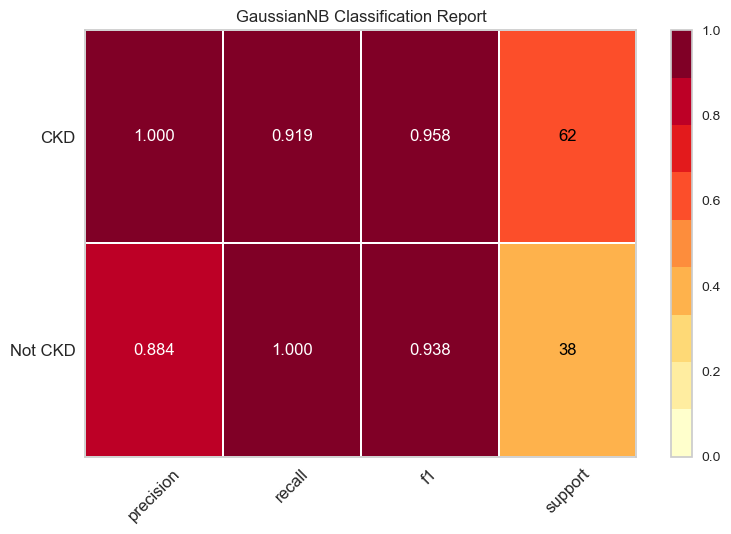

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [128]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(gnb, classes=classes, support=True)
visualizer.fit(os_data_X, os_data_y) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

### SVM  (with feature selection)

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid','poly','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(os_data_X,  os_data_y.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

In [130]:
# make predictions on test set
y_pred1=grid.predict(X_test)

In [131]:
# compute and print accuracy score
print('SVM model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

SVM model accuracy score: 0.9900


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


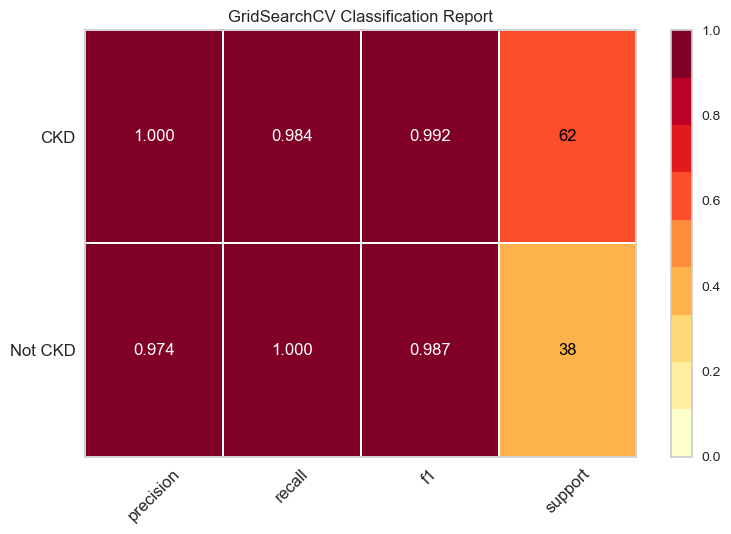

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [132]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(grid, classes=classes, support=True)
visualizer.fit(os_data_X, os_data_y) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

## Creating and testing the models with adaboost (after feature selection)

### SVM With AdaBoost (after feature selection)

In [133]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=SVC(),algorithm='SAMME',n_estimators=100,random_state=100)
abcl = abcl.fit(os_data_X, os_data_y.values.ravel())
y_predict = abcl.predict(X_test)

In [134]:
from sklearn import metrics
#Evaluate the model using accuracy and confusion matrix
acc_AB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using AdaBoosting: ',acc_AB)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))

Accuracy using AdaBoosting:  0.96
Confusion Matrix: 
 [[38  0]
 [ 4 58]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


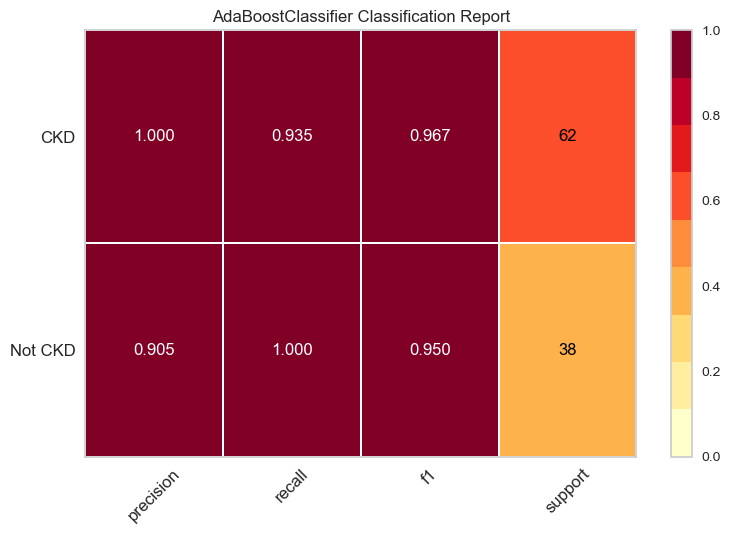

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [135]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(abcl, classes=classes, support=True)
visualizer.fit(os_data_X, os_data_y) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

### Naive-Bayes With AdaBoost (after feature selection)

In [136]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,random_state=100)
abcl = abcl.fit(os_data_X, os_data_y.values.ravel())
y_predict = abcl.predict(X_test)

In [137]:
from sklearn import metrics
#Evaluate the model using accuracy and confusion matrix
acc_AB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using AdaBoosting: ',acc_AB)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))

Accuracy using AdaBoosting:  0.99
Confusion Matrix: 
 [[38  0]
 [ 1 61]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


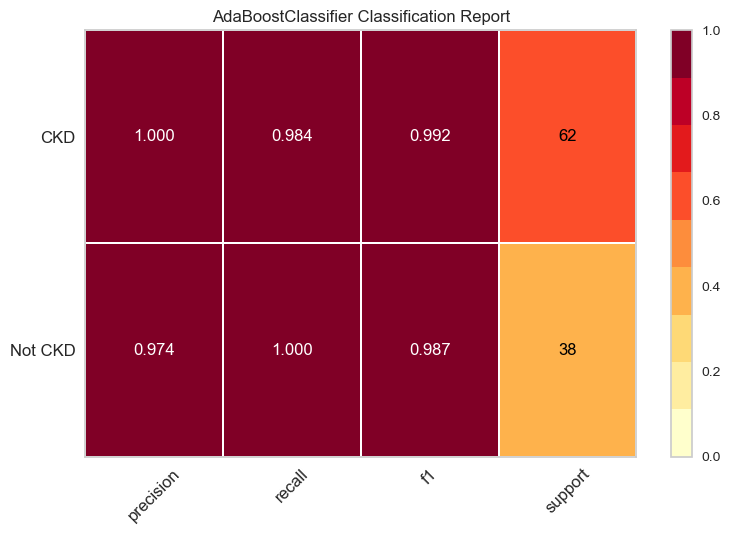

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [138]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not CKD", "CKD"]

visualizer = ClassificationReport(abcl, classes=classes, support=True)
visualizer.fit(os_data_X, os_data_y) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

### The end